<a href="https://colab.research.google.com/github/demirsel/selimdemir/blob/master/Facemesh_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing and installing the required dependencies**

In [1]:
!pip install opencv-python mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.8 MB/s 


In [2]:
import cv2
import mediapipe as mp

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

**Loading the image**

Make sure to load any of your image on Colab and rename it to image.png

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


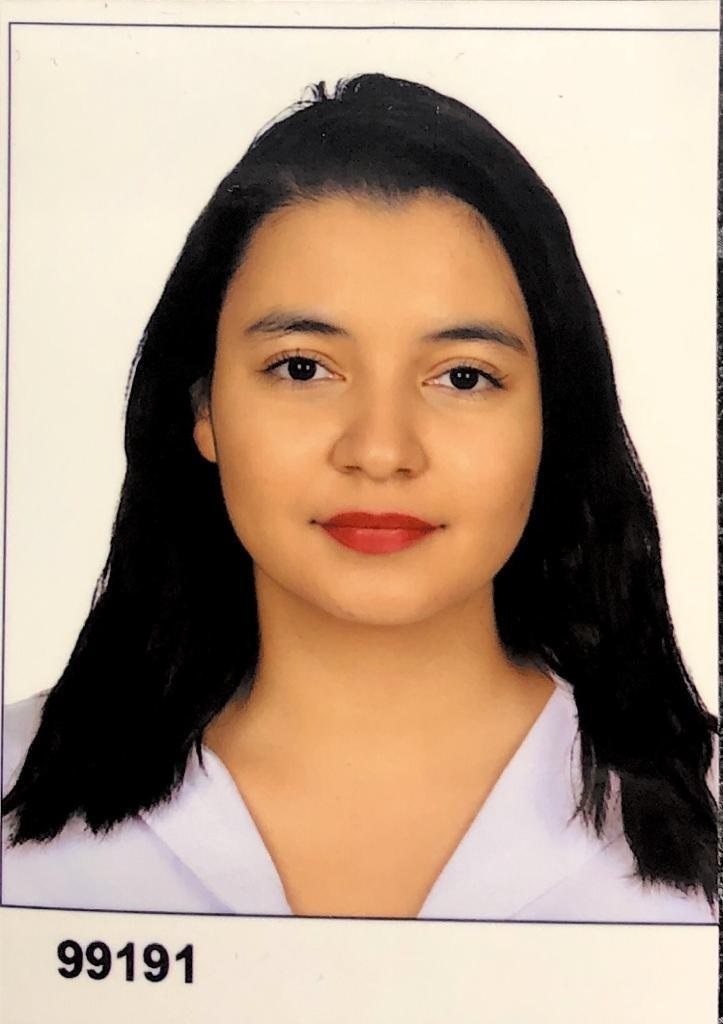

-1

In [15]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/nage.jpg")
cv2_imshow(image)
cv2.waitKey(0)

**Drawing the face mesh annotations on the image**

In [17]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

    image = cv2.imread("/content/drive/MyDrive/nage.jpg")
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.5220755338668823
  y: 0.5029656887054443
  z: -0.050679631531238556
}
landmark {
  x: 0.529938817024231
  y: 0.461005300283432
  z: -0.10971379280090332
}
landmark {
  x: 0.5279201865196228
  y: 0.4733163118362427
  z: -0.0546509250998497
}
landmark {
  x: 0.5145182013511658
  y: 0.41124582290649414
  z: -0.08814644068479538
}
landmark {
  x: 0.530834972858429
  y: 0.445957213640213
  z: -0.11835890263319016
}
landmark {
  x: 0.531471848487854
  y: 0.4259961247444153
  z: -0.11221500486135483
}
landmark {
  x: 0.532589852809906
  y: 0.3780217170715332
  z: -0.06319560110569
}
landmark {
  x: 0.38306164741516113
  y: 0.3652837872505188
  z: 0.016006477177143097
}
landmark {
  x: 0.5340350866317749
  y: 0.342486709356308
  z: -0.054146889597177505
}
landmark {
  x: 0.5352103114128113
  y: 0.32283687591552734
  z: -0.06160592660307884
}
landmark {
  x: 0.5392523407936096
  y: 0.24510222673416138
  z: -0.04860702157020569
}
landmark {
  x: 0.52174639701843

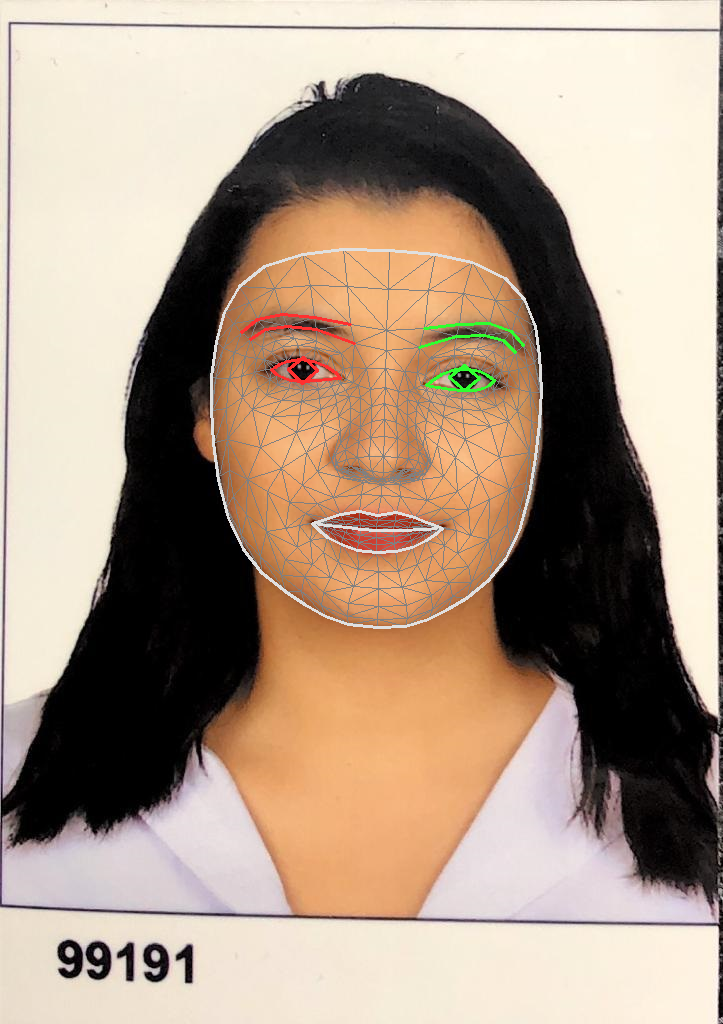

In [18]:
cv2_imshow(annotated_image)

**This is extra code:**

If you want to use your computer webcam

In [26]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [24]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

    image = cv2.imread("photo.jpg")
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.9552971720695496
  y: 0.6959420442581177
  z: -0.020941613242030144
}
landmark {
  x: 0.966266930103302
  y: 0.6638476252555847
  z: -0.030279284343123436
}
landmark {
  x: 0.9581424593925476
  y: 0.6755747199058533
  z: -0.01800694316625595
}
landmark {
  x: 0.951748788356781
  y: 0.6400262713432312
  z: -0.0236812811344862
}
landmark {
  x: 0.9660797715187073
  y: 0.6554556488990784
  z: -0.03125093877315521
}
landmark {
  x: 0.9618859887123108
  y: 0.6458652019500732
  z: -0.02772330865263939
}
landmark {
  x: 0.9486600160598755
  y: 0.6226890087127686
  z: -0.009013778530061245
}
landmark {
  x: 0.8891217708587646
  y: 0.6250129342079163
  z: -0.01716655306518078
}
landmark {
  x: 0.9436330199241638
  y: 0.6010271906852722
  z: -0.002404987346380949
}
landmark {
  x: 0.9432469010353088
  y: 0.5896724462509155
  z: -0.001711450982838869
}
landmark {
  x: 0.9359291791915894
  y: 0.5519727468490601
  z: 0.011053234338760376
}
landmark {
  x: 0.9555944

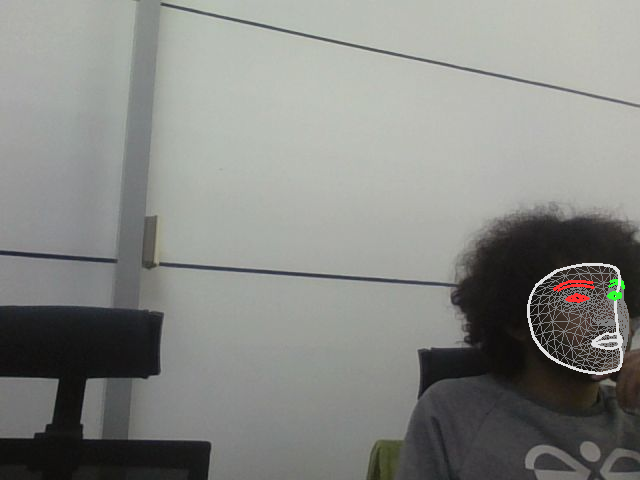

In [25]:
cv2_imshow(annotated_image)

Make sure to delete your photo afterwards and clear the terminal outputs.